# CSE474/574 - Programming Assignment 2

## Part 1 - Sentiment Analysis

In the code provided below, you need to add code wherever specified by `TODO:`. 

> You will be using a Python collection class - `Counter` to maintain the word counts. 

> See https://docs.python.org/2/library/collections.html for more details.

In [9]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [10]:
# read data files 
g = open('reviews.txt','r') # What we know!
reviews_all = list(map(lambda x:x[:-1],g.readlines()))
g.close()
g = open('labels.txt','r') # What we WANT to know!
sentiments_all = list(map(lambda x:x[:-1].upper(),g.readlines()))
g.close()

# load vocabulary
g = open('vocab.txt','r')
vocab = [s.strip() for s in g.readlines()]

The data is a set of 25000 movie reviews, along with a `POSITIVE` or `NEGATIVE` sentiment label assigned to the review.

In [11]:
# Check out sample reviews
print('A {} review:'.format(sentiments_all[0]))
print(reviews_all[0])
print('\nA {} review:'.format(sentiments_all[1]))
print(reviews_all[1])

A POSITIVE review:
bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   

A NEGATIVE review:
story of a man who has unnatural feelings for a pig . starts out with a opening scene that is a terrific example of absurd comed

In [12]:
# split into training and test data
reviews_train,reviews_test = reviews_all[0:24000],reviews_all[24000:]
sentiments_train,sentiments_test = sentiments_all[0:24000],sentiments_all[24000:]

In [13]:
# maintain Counter objects to store positive, negative and total counts for
# all the words present in the positive, negative and total reviews.
positive_word_count = Counter()
negative_word_count = Counter()
total_counts = Counter()
# TODO: Loop over all the words in the vocabulary
# and increment the counts in the appropriate counter objects
# based on the training data


for i in range(0, len(sentiments_train)):
    if sentiments_train[i] == 'NEGATIVE':
        negative_word_count.update(reviews_train[i].split())
    else:
        positive_word_count.update(reviews_train[i].split())
        
total_counts.update(positive_word_count)
total_counts.update(negative_word_count)



In [14]:
# maintain a Counter object to store positive to negative ratios 
pos_neg_ratios = Counter()

# Calculate the ratios of positive and negative uses of the most common words
# Consider words to be "common" if they've been used at least 100 times
for term,cnt in list(total_counts.most_common()):
    if(cnt > 100):
        # TODO: Code for calculating the ratios (remove the next line)
        if(negative_word_count[term] != 0):
            ratio = positive_word_count[term] / negative_word_count[term]
        else:
            ratio = positive_word_count[term]
        pos_neg_ratios.update({term: ratio})
print("Pos-to-neg ratio for 'the' = {}".format(pos_neg_ratios["the"]))


Pos-to-neg ratio for 'the' = 1.0618582280413789


In [15]:
print("Pos-to-neg ratio for 'the' = {}".format(pos_neg_ratios["the"]))
print("Pos-to-neg ratio for 'amazing' = {}".format(pos_neg_ratios["amazing"]))
print("Pos-to-neg ratio for 'terrible' = {}".format(pos_neg_ratios["terrible"]))

Pos-to-neg ratio for 'the' = 1.0618582280413789
Pos-to-neg ratio for 'amazing' = 4.031496062992126
Pos-to-neg ratio for 'terrible' = 0.17256637168141592


In [16]:
# take a log of the ratio
for word,ratio in pos_neg_ratios.most_common():
    pos_neg_ratios[word] = np.log(ratio)    

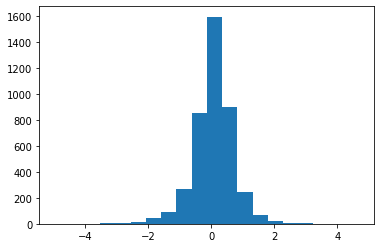

In [17]:
# visualize the distribution of the log-ratio scores
scores = np.array(list(pos_neg_ratios.values()))
vocab_selected = list(pos_neg_ratios.keys())

h = plt.hist(scores,bins=20)

The above histogram should give you an idea about the distribution of the scores.

Notice how the scores are distributed around 0. A word with score 0 can be considered as `neutral`. 

In [18]:
# Print few words with neutral score
for ind in np.where(scores == 0)[0][0:10]:
    print(vocab_selected[ind])

realize
hands
extreme
beat
onto
psycho
test
obsessed
choose
speech


**APPROACH 1** Implement a simple non-machine learning that only uses the log-ratios to determine if a review is positive or negative. This function will be applied to the test data to calculate the accuracy of the model. 

_See the assignment document for hints._

In [19]:
def nonml_classifier(review,pos_neg_ratios):
    
    '''
    Function that determines the sentiment for a given review.
    
    Inputs:
      review - A text containing a movie review
      pos_neg_ratios - A Counter object containing frequent words
                       and corresponding log positive-negative ratio
    Return:
      sentiment - 'NEGATIVE' or 'POSITIVE'
    '''
    
    count_reviews = Counter()
    count_reviews.update(review.split())
    
    pos = 0
    neg = 0
    
    for i in count_reviews:
        if i in pos_neg_ratios:
            pos += pos_neg_ratios[i] 
        else:
            neg += pos_neg_ratios[i]
    
    res = pos / neg
    
    return "POSITIVE" if res > 1 else "NEGATIVE"
    
    # TODO: Implement the algorithm here. Change the next line.


In [20]:
predictions_test = []
for r in reviews_test:
    l = nonml_classifier(r,pos_neg_ratios)
    predictions_test.append(l)

# calculate accuracy
correct = 0
for l,p in zip(sentiments_test,predictions_test):
    if l == p:
        correct = correct + 1
print('Accuracy of the model = {}'.format(correct/len(sentiments_test)))

Accuracy of the model = 0.794


/anaconda/envs/py37_default/lib/python3.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: divide by zero encountered in double_scalars


**Approach 2** Implement a neural network for sentiment classification. 

> ### System Configuration
This part requires you to use a computer with `tensorflow` library installed. More information is available here - https://www.tensorflow.org.
`
You are allowed to implement the project on your personal computers using `Python 3.4 or above. You will need `numpy` and `scipy` libraries. If you need to use departmental resources, you can use **metallica.cse.buffalo.edu**, which has `Python 3.4.3` and the required libraries installed. 

> Students attempting to use the `tensorflow` library have two options: 
1. Install `tensorflow` on personal machines. Detailed installation information is here - https://www.tensorflow.org/. Note that, since `tensorflow` is a relatively new library, you might encounter installation issues depending on your OS and other library versions. We will not be providing any detailed support regarding `tensorflow` installation. If issues persist, we recommend using option 2. 
2. Use **metallica.cse.buffalo.edu**. If you are registered into the class, you should have an account on that server. The server already has Python 3.4.3 and TensorFlow 0.12.1 installed. Please use /util/bin/python for Python 3. 
3. To maintain a ssh connection for a long-running task on a remote machine, use tools like `screen`. For more information: https://linuxize.com/post/how-to-use-linux-screen/ 
4. For running jupyter-notebook over a remote machine find information on: https://fizzylogic.nl/2017/11/06/edit-jupyter-notebooks-over-ssh/
 


In [21]:
def create_input_vector(review,word2index):
    '''
    Function to count how many times each word is used in the given review,
    # and then store those counts at the appropriate indices inside x.
    '''
    vocab_size = len(word2index)
    x = np.zeros((1, vocab_size))
    for w in review.split(' '):
        if w in word2index.keys():
            x[0][word2index[w]] += 1
    return x

In [22]:
def find_ignore_words(pos_neg_ratios):
    '''
    Function to identify words to ignore from the vocabulary
    '''
    ignore_words = []
    # TODO: Complete the implementation of find_ignore_words
    
    for i in pos_neg_ratios:
        if pos_neg_ratios[i] == 0:
            ignore_words.append(i)    
    
    return ignore_words

In [23]:
# create a word2index mapping from word to an integer index
word2index = {}
ignore_words = find_ignore_words(pos_neg_ratios)
vocab_selected = list(set(vocab_selected).difference(set(ignore_words)))
for i,word in enumerate(vocab_selected):
    if word not in ignore_words:
        word2index[word] = i
vocab_size = len(word2index)

#### Generate .hdf5 files from the processed data
Given that the data is moderately large sized, the `hdf5` file format provides a more efficient file representation for further processing. See [here](https://anaconda.org/anaconda/hdf5) for more details and installation instructions.

In [24]:
import h5py

In [25]:
# Run the script once to generate the file 
# delete the exiting 'data1.hdf5' file before running it again to avoid error 
labels_train = np.zeros((len(sentiments_train), 2), dtype=int)
labels_test = np.zeros((len(sentiments_test), 2), dtype=int)

with h5py.File('data1.hdf5', 'w') as hf:
    hf.create_dataset('data_train', (labels_train.shape[0], vocab_size), np.int16)
    hf.create_dataset('data_test', (labels_test.shape[0], vocab_size), np.int16)
    # create training data
    for i,(r,l) in enumerate(zip(reviews_train, sentiments_train)):
        hf["data_train"][i] = create_input_vector(r,word2index)
        # one-hot encoding
        if l == 'NEGATIVE':
            labels_train[i, 0] = 1
        else:
            labels_train[i, 1] = 1
    # create test data
    for i,(r,l) in enumerate(zip(reviews_test, sentiments_test)):
        hf["data_test"][i] = create_input_vector(r,word2index)
        # one-hot encoding
        if l == 'NEGATIVE':
            labels_test[i, 0] = 1
        else:
            labels_test[i, 1] = 1

In [26]:
import tensorflow as tf 
tf.compat.v1.random.set_random_seed(10)

# Vanilla Neural Network

In [49]:
# parameters of the network
learning_rate = 0.01
batch_size = 400
num_epochs = 50
n_input = vocab_size
n_classes = 2

In [50]:
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

# Define weights and biases in Tensorflow according to the parameters set above
n_hidden_1 = 10  # 1st layer number of neurons
weights = {
	'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
	'out1': tf.Variable(tf.random_normal([n_hidden_1, n_classes]))
}
biases = {
	'b1': tf.Variable(tf.random_normal([n_hidden_1])),
	'out2': tf.Variable(tf.random_normal([n_classes]))
}

In [51]:
def multilayer_perceptron(x):
    # define the layers of a single layer perceptron
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    out_layer = tf.nn.sigmoid(tf.matmul(layer_1, weights['out1']) + biases['out2'])
    return out_layer

In [52]:
logits = multilayer_perceptron(X)
# Define loss(softmax_cross_entropy_with_logits) and optimizer(AdamOptimizer)
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)
# Initializing the variables
init = tf.global_variables_initializer()

In [53]:
# use the following two lines to resolve that issue
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [54]:
with tf.Session() as sess:
    start_time = time.time()
    sess.run(init)

    h = h5py.File('data1.hdf5', 'r')
    n1 = h.get('data_train') 
    n2 = h.get('data_test')

    # Training cycle
    total_batch_train = int(n1.shape[0] / batch_size)
    total_batch_test = int(n2.shape[0] / batch_size)

    for iter_num in range(num_epochs):
        # variables for train and test accuracies
        avg_acc_train = 0.
        avg_acc_test = 0.
        for i in range(total_batch_train):
            train_x = n1[(i) * batch_size: (i + 1) * batch_size, ...]
            train_y = labels_train[(i) * batch_size: (i + 1) * batch_size, :]

            _, c_train, _logits_train = sess.run([train_op, loss_op, logits], feed_dict={X: train_x, Y: train_y})
            _label_train = [np.argmax(i) for i in _logits_train]
            _label_train_y = [np.argmax(i) for i in train_y]
            _accuracy_train = np.mean(np.array(_label_train) == np.array(_label_train_y))
            avg_acc_train += _accuracy_train


        for j in range(total_batch_test):
            test_x = n2[(j) * batch_size: (j + 1) * batch_size, ...]
            test_y = labels_test[(j) * batch_size: (j + 1) * batch_size, :]

            c_test, _logits_test = sess.run([loss_op, logits], feed_dict={X: test_x, Y: test_y})
            _label_test = [np.argmax(i) for i in _logits_test]
            _label_test_y = [np.argmax(i) for i in test_y]
            _accuracy_test = np.mean(np.array(_label_test) == np.array(_label_test_y))
            avg_acc_test += _accuracy_test

        # print the train and test accuracies   
        print("Train acc: %f, Test_acc: %f" % (avg_acc_train/total_batch_train, avg_acc_test/total_batch_test))
    duration = time.time() - start_time
    print('Time elapsed - {} seconds.'.format(duration))

Train acc: 0.507292, Test_acc: 0.501250
Train acc: 0.504542, Test_acc: 0.506250
Train acc: 0.509458, Test_acc: 0.512500
Train acc: 0.642833, Test_acc: 0.673750
Train acc: 0.770833, Test_acc: 0.770000
Train acc: 0.813250, Test_acc: 0.795000
Train acc: 0.833542, Test_acc: 0.820000
Train acc: 0.849583, Test_acc: 0.812500
Train acc: 0.861708, Test_acc: 0.816250
Train acc: 0.857292, Test_acc: 0.838750
Train acc: 0.880458, Test_acc: 0.838750
Train acc: 0.890417, Test_acc: 0.835000
Train acc: 0.896750, Test_acc: 0.831250
Train acc: 0.905833, Test_acc: 0.843750
Train acc: 0.905417, Test_acc: 0.837500
Train acc: 0.915000, Test_acc: 0.842500
Train acc: 0.915417, Test_acc: 0.832500
Train acc: 0.907375, Test_acc: 0.842500
Train acc: 0.916667, Test_acc: 0.843750
Train acc: 0.923458, Test_acc: 0.842500
Train acc: 0.925000, Test_acc: 0.841250
Train acc: 0.927417, Test_acc: 0.850000
Train acc: 0.927958, Test_acc: 0.842500
Train acc: 0.928375, Test_acc: 0.845000
Train acc: 0.932500, Test_acc: 0.851250


# Added another hidden layer with width of 32.

In [27]:
# parameters of the network
learning_rate = 0.01
batch_size = 400
num_epochs = 50 #### Increased Epochs from 50 to 100 ###
n_input = vocab_size
n_classes = 2

In [100]:
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

# Define weights and biases in Tensorflow according to the parameters set above
n_hidden_1 = 32  # 1st layer number of neurons
n_hidden_2 = 32 ######## ADDED SECOND LAYER ############
weights = {
	'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])), #### combined  ####
	'out1': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
	'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])), #### New Bias ####
	'out2': tf.Variable(tf.random_normal([n_classes]))
}

In [106]:
def multilayer_perceptron(x):
    # define the layers of a single layer perceptron
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1) #### activation function --> Makes NN work better ####
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']) #### Added second layer ####
    layer_2 = tf.nn.relu(layer_2) #### activation function --> Makes NN work better ####
    out_layer = tf.nn.sigmoid(tf.matmul(layer_2, weights['out1']) + biases['out2'])
    return out_layer

In [107]:
logits = multilayer_perceptron(X)
# Define loss(softmax_cross_entropy_with_logits) and optimizer(AdamOptimizer)
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate) ### Changing to different optimizer might be better ###
train_op = optimizer.minimize(loss_op)
# Initializing the variables
init = tf.global_variables_initializer()

In [5]:
# for some macosx installations, conflicting copies of mpilib causes trouble with tensorflow.
# use the following two lines to resolve that issue
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [109]:
with tf.Session() as sess:
    start_time = time.time()
    sess.run(init)

    h = h5py.File('data1.hdf5', 'r')
    n1 = h.get('data_train') 
    n2 = h.get('data_test')

    # Training cycle
    total_batch_train = int(n1.shape[0] / batch_size)
    total_batch_test = int(n2.shape[0] / batch_size)

    for iter_num in range(num_epochs):
        # variables for train and test accuracies
        avg_acc_train = 0.
        avg_acc_test = 0.
        for i in range(total_batch_train):
            train_x = n1[(i) * batch_size: (i + 1) * batch_size, ...]
            train_y = labels_train[(i) * batch_size: (i + 1) * batch_size, :]

            _, c_train, _logits_train = sess.run([train_op, loss_op, logits], feed_dict={X: train_x, Y: train_y})
            _label_train = [np.argmax(i) for i in _logits_train]
            _label_train_y = [np.argmax(i) for i in train_y]
            _accuracy_train = np.mean(np.array(_label_train) == np.array(_label_train_y))
            avg_acc_train += _accuracy_train


        for j in range(total_batch_test):
            test_x = n2[(j) * batch_size: (j + 1) * batch_size, ...]
            test_y = labels_test[(j) * batch_size: (j + 1) * batch_size, :]

            c_test, _logits_test = sess.run([loss_op, logits], feed_dict={X: test_x, Y: test_y})
            _label_test = [np.argmax(i) for i in _logits_test]
            _label_test_y = [np.argmax(i) for i in test_y]
            _accuracy_test = np.mean(np.array(_label_test) == np.array(_label_test_y))
            avg_acc_test += _accuracy_test

        # print the train and test accuracies   
        print("Train acc: %f, Test_acc: %f" % (avg_acc_train/total_batch_train, avg_acc_test/total_batch_test))
    duration = time.time() - start_time
    print('Time elapsed - {} seconds.'.format(duration))

Train acc: 0.517875, Test_acc: 0.571250
Train acc: 0.527958, Test_acc: 0.500000
Train acc: 0.501583, Test_acc: 0.505000
Train acc: 0.589583, Test_acc: 0.646250
Train acc: 0.643625, Test_acc: 0.605000
Train acc: 0.703417, Test_acc: 0.662500
Train acc: 0.673333, Test_acc: 0.583750
Train acc: 0.724792, Test_acc: 0.738750
Train acc: 0.724958, Test_acc: 0.740000
Train acc: 0.766750, Test_acc: 0.677500
Train acc: 0.711958, Test_acc: 0.655000
Train acc: 0.708458, Test_acc: 0.731250
Train acc: 0.735500, Test_acc: 0.641250
Train acc: 0.768458, Test_acc: 0.777500
Train acc: 0.802417, Test_acc: 0.772500
Train acc: 0.828000, Test_acc: 0.796250
Train acc: 0.832042, Test_acc: 0.796250
Train acc: 0.813250, Test_acc: 0.807500
Train acc: 0.826167, Test_acc: 0.823750
Train acc: 0.806208, Test_acc: 0.791250
Train acc: 0.840208, Test_acc: 0.792500
Train acc: 0.832708, Test_acc: 0.823750
Train acc: 0.858292, Test_acc: 0.827500
Train acc: 0.856667, Test_acc: 0.815000
Train acc: 0.852375, Test_acc: 0.826250


# Updated Epich to be 100 and single hidden layer width to 64

In [32]:
# parameters of the network
learning_rate = 0.01
batch_size = 400
num_epochs = 100 #### Increased Epochs from 50 to 100 ###
n_input = vocab_size
n_classes = 2

In [33]:
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

# Define weights and biases in Tensorflow according to the parameters set above
n_hidden_1 = 64  # 1st layer number of neurons
weights = {
	'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
	'out1': tf.Variable(tf.random_normal([n_hidden_1, n_classes]))
}
biases = {
	'b1': tf.Variable(tf.random_normal([n_hidden_1])),
	'out2': tf.Variable(tf.random_normal([n_classes]))
}

In [34]:
def multilayer_perceptron(x):
    # define the layers of a single layer perceptron
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    out_layer = tf.nn.sigmoid(tf.matmul(layer_1, weights['out1']) + biases['out2'])
    return out_layer

In [35]:
logits = multilayer_perceptron(X)
# Define loss(softmax_cross_entropy_with_logits) and optimizer(AdamOptimizer)
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)
# Initializing the variables
init = tf.global_variables_initializer()

In [36]:
with tf.Session() as sess:
    start_time = time.time()
    sess.run(init)

    h = h5py.File('data1.hdf5', 'r')
    n1 = h.get('data_train') 
    n2 = h.get('data_test')

    # Training cycle
    total_batch_train = int(n1.shape[0] / batch_size)
    total_batch_test = int(n2.shape[0] / batch_size)

    for iter_num in range(num_epochs):
        # variables for train and test accuracies
        avg_acc_train = 0.
        avg_acc_test = 0.
        for i in range(total_batch_train):
            train_x = n1[(i) * batch_size: (i + 1) * batch_size, ...]
            train_y = labels_train[(i) * batch_size: (i + 1) * batch_size, :]

            _, c_train, _logits_train = sess.run([train_op, loss_op, logits], feed_dict={X: train_x, Y: train_y})
            _label_train = [np.argmax(i) for i in _logits_train]
            _label_train_y = [np.argmax(i) for i in train_y]
            _accuracy_train = np.mean(np.array(_label_train) == np.array(_label_train_y))
            avg_acc_train += _accuracy_train


        for j in range(total_batch_test):
            test_x = n2[(j) * batch_size: (j + 1) * batch_size, ...]
            test_y = labels_test[(j) * batch_size: (j + 1) * batch_size, :]

            c_test, _logits_test = sess.run([loss_op, logits], feed_dict={X: test_x, Y: test_y})
            _label_test = [np.argmax(i) for i in _logits_test]
            _label_test_y = [np.argmax(i) for i in test_y]
            _accuracy_test = np.mean(np.array(_label_test) == np.array(_label_test_y))
            avg_acc_test += _accuracy_test

        # print the train and test accuracies   
        print("Train acc: %f, Test_acc: %f" % (avg_acc_train/total_batch_train, avg_acc_test/total_batch_test))
    duration = time.time() - start_time
    print('Time elapsed - {} seconds.'.format(duration))


Train acc: 0.551667, Test_acc: 0.601250
Train acc: 0.658500, Test_acc: 0.655000
Train acc: 0.717125, Test_acc: 0.705000
Train acc: 0.773042, Test_acc: 0.767500
Train acc: 0.798917, Test_acc: 0.766250
Train acc: 0.821958, Test_acc: 0.791250
Train acc: 0.825875, Test_acc: 0.810000
Train acc: 0.822500, Test_acc: 0.813750
Train acc: 0.855458, Test_acc: 0.792500
Train acc: 0.852292, Test_acc: 0.827500
Train acc: 0.857792, Test_acc: 0.831250
Train acc: 0.870125, Test_acc: 0.825000
Train acc: 0.866500, Test_acc: 0.816250
Train acc: 0.864000, Test_acc: 0.818750
Train acc: 0.871750, Test_acc: 0.828750
Train acc: 0.876417, Test_acc: 0.828750
Train acc: 0.880792, Test_acc: 0.812500
Train acc: 0.884417, Test_acc: 0.821250
Train acc: 0.882583, Test_acc: 0.832500
Train acc: 0.877167, Test_acc: 0.833750
Train acc: 0.891583, Test_acc: 0.837500
Train acc: 0.891375, Test_acc: 0.828750
Train acc: 0.894333, Test_acc: 0.830000
Train acc: 0.884625, Test_acc: 0.830000
Train acc: 0.897292, Test_acc: 0.822500


# Two hidden layers of 32 width, 100 epochs

In [37]:
# parameters of the network
learning_rate = 0.01
batch_size = 400
num_epochs = 100 #### Increased Epochs from 50 to 100 ###
n_input = vocab_size
n_classes = 2

In [43]:
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

# Define weights and biases in Tensorflow according to the parameters set above
n_hidden_1 = 64  # 1st layer number of neurons
n_hidden_2 = 64 ######## ADDED SECOND LAYER ############
weights = {
	'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])), #### combined  ####
	'out1': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
	'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])), #### New Bias ####
	'out2': tf.Variable(tf.random_normal([n_classes]))
}

In [44]:
def multilayer_perceptron(x):
    # define the layers of a single layer perceptron
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1) #### activation function --> Makes NN work better ####
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']) #### Added second layer ####
    layer_2 = tf.nn.relu(layer_2) #### activation function --> Makes NN work better ####
    out_layer = tf.nn.sigmoid(tf.matmul(layer_2, weights['out1']) + biases['out2'])
    return out_layer

In [45]:
logits = multilayer_perceptron(X)
# Define loss(softmax_cross_entropy_with_logits) and optimizer(AdamOptimizer)
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate) ### Changing to different optimizer might be better ###
train_op = optimizer.minimize(loss_op)
# Initializing the variables
init = tf.global_variables_initializer()

In [46]:
# for some macosx installations, conflicting copies of mpilib causes trouble with tensorflow.
# use the following two lines to resolve that issue
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [47]:
with tf.Session() as sess:
    start_time = time.time()
    sess.run(init)

    h = h5py.File('data1.hdf5', 'r')
    n1 = h.get('data_train') 
    n2 = h.get('data_test')

    # Training cycle
    total_batch_train = int(n1.shape[0] / batch_size)
    total_batch_test = int(n2.shape[0] / batch_size)

    for iter_num in range(num_epochs):
        # variables for train and test accuracies
        avg_acc_train = 0.
        avg_acc_test = 0.
        for i in range(total_batch_train):
            train_x = n1[(i) * batch_size: (i + 1) * batch_size, ...]
            train_y = labels_train[(i) * batch_size: (i + 1) * batch_size, :]

            _, c_train, _logits_train = sess.run([train_op, loss_op, logits], feed_dict={X: train_x, Y: train_y})
            _label_train = [np.argmax(i) for i in _logits_train]
            _label_train_y = [np.argmax(i) for i in train_y]
            _accuracy_train = np.mean(np.array(_label_train) == np.array(_label_train_y))
            avg_acc_train += _accuracy_train


        for j in range(total_batch_test):
            test_x = n2[(j) * batch_size: (j + 1) * batch_size, ...]
            test_y = labels_test[(j) * batch_size: (j + 1) * batch_size, :]

            c_test, _logits_test = sess.run([loss_op, logits], feed_dict={X: test_x, Y: test_y})
            _label_test = [np.argmax(i) for i in _logits_test]
            _label_test_y = [np.argmax(i) for i in test_y]
            _accuracy_test = np.mean(np.array(_label_test) == np.array(_label_test_y))
            avg_acc_test += _accuracy_test

        # print the train and test accuracies   
        print("Train acc: %f, Test_acc: %f" % (avg_acc_train/total_batch_train, avg_acc_test/total_batch_test))
    duration = time.time() - start_time
    print('Time elapsed - {} seconds.'.format(duration))

Train acc: 0.499125, Test_acc: 0.501250
Train acc: 0.500458, Test_acc: 0.500000
Train acc: 0.500542, Test_acc: 0.501250
Train acc: 0.500583, Test_acc: 0.502500
Train acc: 0.500667, Test_acc: 0.502500
Train acc: 0.500625, Test_acc: 0.502500
Train acc: 0.500625, Test_acc: 0.502500
Train acc: 0.500583, Test_acc: 0.502500
Train acc: 0.500583, Test_acc: 0.502500
Train acc: 0.500625, Test_acc: 0.502500
Train acc: 0.500625, Test_acc: 0.502500
Train acc: 0.500667, Test_acc: 0.502500
Train acc: 0.500583, Test_acc: 0.500000
Train acc: 0.511667, Test_acc: 0.532500
Train acc: 0.505542, Test_acc: 0.500000
Train acc: 0.501208, Test_acc: 0.500000
Train acc: 0.502208, Test_acc: 0.501250
Train acc: 0.506083, Test_acc: 0.500000
Train acc: 0.526042, Test_acc: 0.500000
Train acc: 0.500000, Test_acc: 0.500000
Train acc: 0.500000, Test_acc: 0.500000
Train acc: 0.500000, Test_acc: 0.500000
Train acc: 0.500000, Test_acc: 0.500000
Train acc: 0.500000, Test_acc: 0.500000
Train acc: 0.500000, Test_acc: 0.500000
